In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('product i_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_i= df.drop(['Product Name','Product Category','Month','Year'],axis=1)

In [4]:
sales_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         60 non-null     int64  
 1   SMA_12months  48 non-null     float64
 2   SMA_6months   54 non-null     float64
 3   SMA_3months   57 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [5]:
sales_i.head()

,Sales,SMA_12months,SMA_6months,SMA_3months
Month-Year,,,,
2019-01-01,50833,NaN,NaN,NaN
2019-02-01,65670,NaN,NaN,NaN
2019-03-01,89667,NaN,NaN,NaN
2019-04-01,60960,NaN,NaN,68723.0
2019-05-01,43410,NaN,NaN,72099.0


<Axes: title={'center': 'Product I'}, xlabel='Month-Year'>

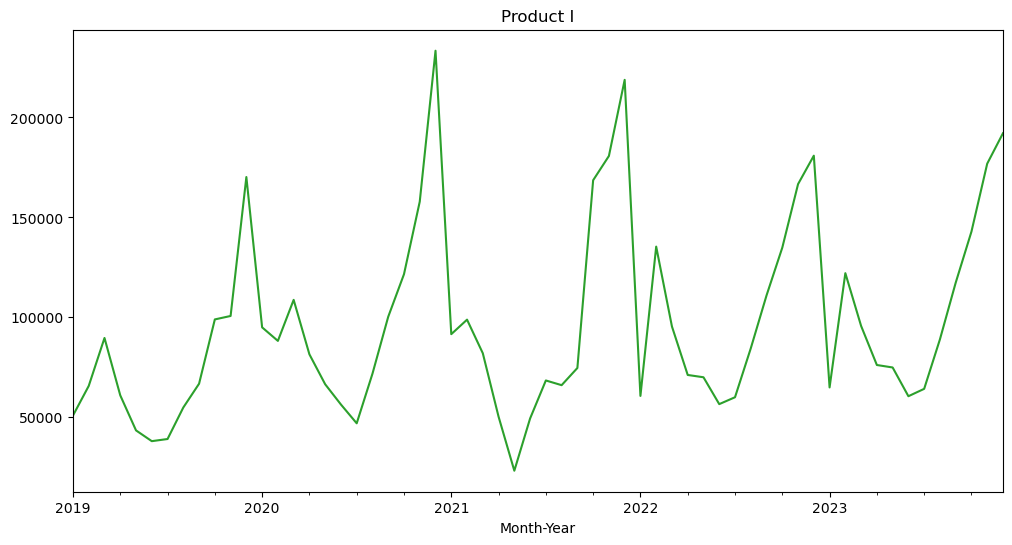

In [6]:
sales_i['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product I')

In [7]:
test_3= sales_i['Sales'].iloc[57:]
test_6=sales_i['Sales'].iloc[54:]
test_12=sales_i['Sales'].iloc[48:]

In [8]:
pred_3=sales_i['SMA_3months'].iloc[57:]
pred_6=sales_i['SMA_6months'].iloc[54:]
pred_12=sales_i['SMA_12months'].iloc[48:]

In [9]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 73623.000
MAPE - Simple Moving Averages_3 months: 0.426
MSE - Simple Moving Averages_3 months: 5662343573.667
RMSE - Simple Moving Averages_3 months: 75248.545


In [10]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 57061.833
MAPE - Simple Moving Averages_6 months: 0.381
MSE - Simple Moving Averages_6 months: 4939396695.500
RMSE - Simple Moving Averages_6 months: 70280.842


In [11]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 33702.250
MAPE - Simple Moving Averages_12 months: 0.365
MSE - Simple Moving Averages_12 months: 1531933802.750
RMSE - Simple Moving Averages_12 months: 39139.926


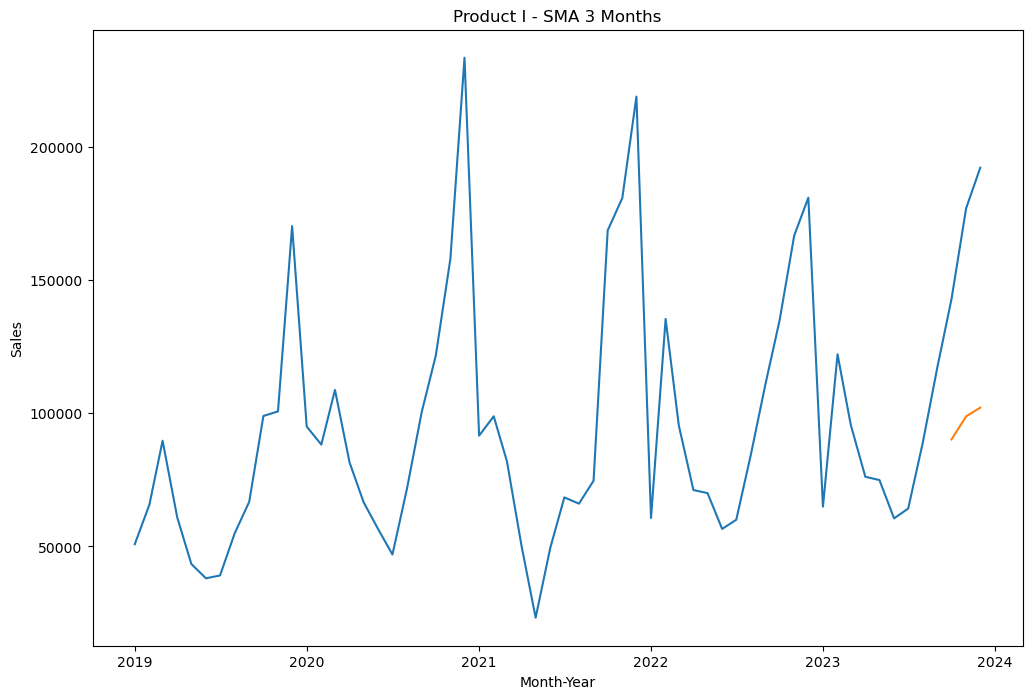

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i['Sales'])
sns.lineplot(pred_3)
plt.title('Product I - SMA 3 Months')
plt.show()

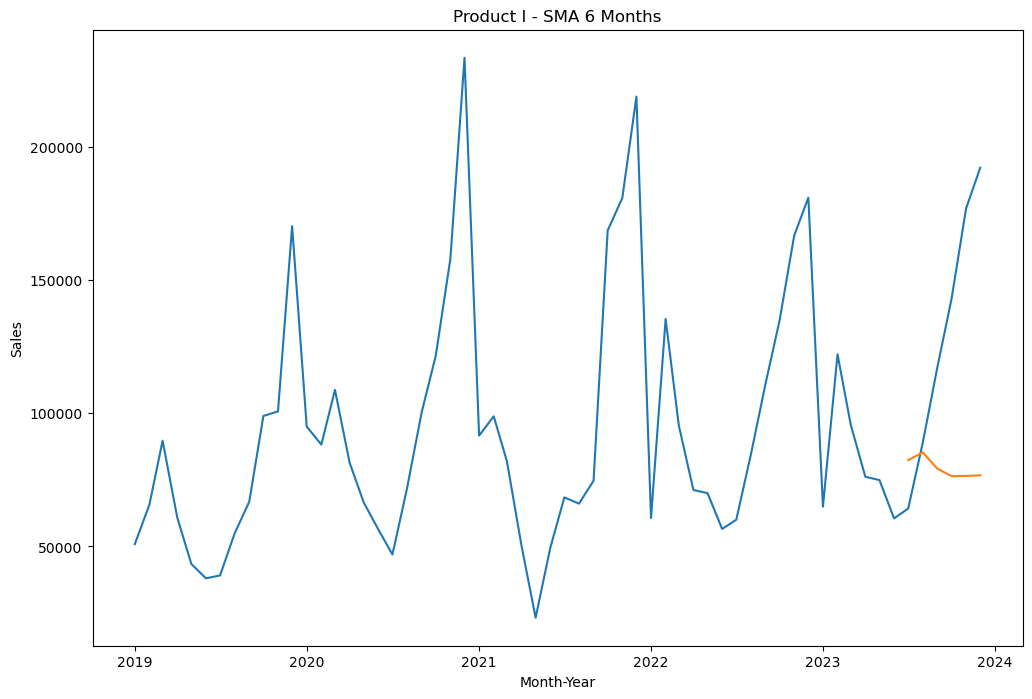

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i['Sales'])
sns.lineplot(pred_6)
plt.title('Product I - SMA 6 Months')
plt.show()

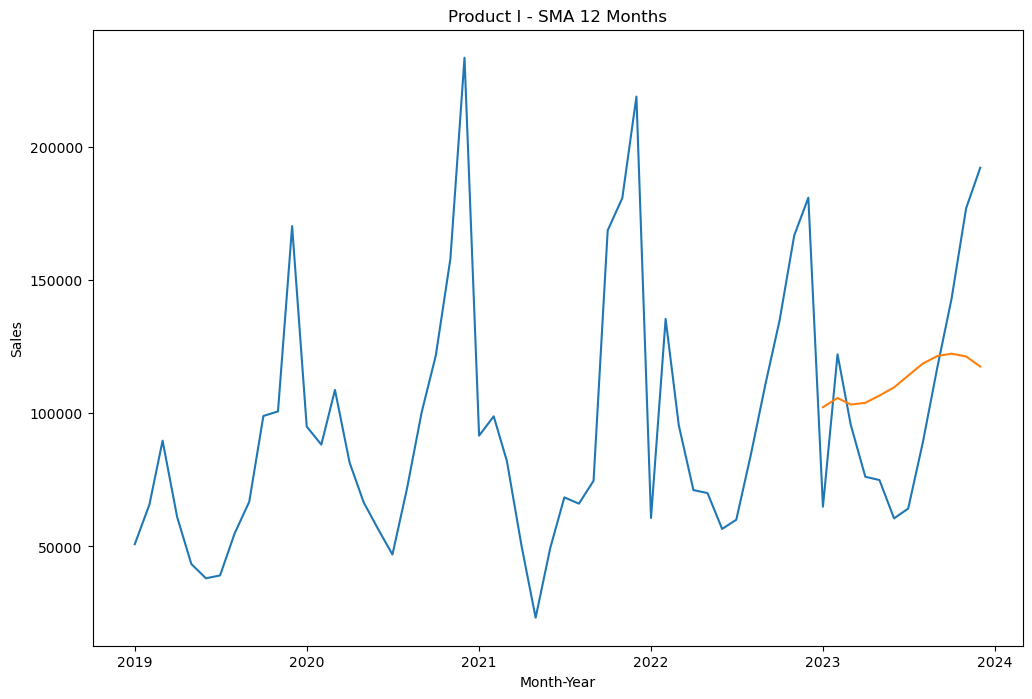

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i['Sales'])
sns.lineplot(pred_12)
plt.title('Product I - SMA 12 Months')
plt.show()

In [15]:
SALES_I=  df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [16]:
TRAIN=SALES_I[:48]

# Calculate the 12-month moving average for the last 12 months
sma_12 = TRAIN.rolling(window=12).mean().iloc[-1]

In [17]:
# Initialize a list to hold your predictions
predictions = [sma_12]

# Generate predictions for the next 12 months
for i in range(11):
    # Add the most recent prediction to the sales data
    TRAIN= TRAIN.append(predictions[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions.append(TRAIN.rolling(window=12).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions = np.array(predictions)

# Print the predictions
print(predictions)

[[102248.58333333]
 [105714.29861111]
 [103242.1568287 ]
 [103896.08656443]
 [106624.67711146]
 [109676.73353742]
 [114103.21133221]
 [118611.81227656]
 [121457.2132996 ]
 [122332.3144079 ]
 [121287.67394189]
 [117506.89677039]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\267

In [18]:
TEST=SALES_I[48:]
TEST['Predictions']=predictions

C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\292529769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST['Predictions']=predictions


In [19]:
_mae_12= mean_absolute_error(TEST['Sales'],TEST['Predictions'])
_mse_12=mean_squared_error(TEST['Sales'],TEST['Predictions'])
_mape_12= mean_absolute_percentage_error(TEST['Sales'],TEST['Predictions'])
_rmse_12= np.sqrt(mean_squared_error(TEST['Sales'],TEST['Predictions']))

print(f'MAE - Moving Averages_12 months: {_mae_12:0.3f}')
print(f'MAPE - Moving Averages_12 months: {_mape_12:0.3f}')
print(f'MSE - Moving Averages_12 months: {_mse_12:0.3f}')
print(f'RMSE - Moving Averages_12 months: {_rmse_12:0.3f}')

MAE - Moving Averages_12 months: 33702.191
MAPE - Moving Averages_12 months: 0.365
MSE - Moving Averages_12 months: 1531931308.386
RMSE - Moving Averages_12 months: 39139.894


In [20]:
TEST

,Sales,Predictions
Month-Year,,
2023-01-01,64906,102248.583333
2023-02-01,122096,105714.298611
2023-03-01,95682,103242.156829
2023-04-01,76134,103896.086564
2023-05-01,74900,106624.677111
2023-06-01,60518,109676.733537
2023-07-01,64200,114103.211332
2023-08-01,88953,118611.812277
2023-09-01,117297,121457.213300


In [21]:
TRAIN_6=SALES_I[:54]

# Calculate the 6-month moving average for the last 6 months
sma_6 = TRAIN_6.rolling(window=6).mean().iloc[-1]

In [22]:
# Initialize a list to hold your predictions
predictions_6 = [sma_6]

# Generate predictions for the next 6 months
for i in range(5):
    # Add the most recent prediction to the sales data
    TRAIN_6= TRAIN_6.append(predictions_6[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_6.append(TRAIN_6.rolling(window=6).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_6 = np.array(predictions_6)

# Print the predictions
print(predictions_6)

[[82372.66666667]
 [85283.77777778]
 [79148.40740741]
 [76392.80864198]
 [76435.94341564]
 [76691.93398491]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\

In [23]:
TEST_6=SALES_I[54:]
TEST_6['Predictions_6']=predictions_6

C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\1928910215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_6['Predictions_6']=predictions_6


In [24]:
_mae_6= mean_absolute_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mse_6=mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mape_6= mean_absolute_percentage_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_rmse_6= np.sqrt(mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6']))

print(f'MAE - Moving Averages_6 months: {_mae_6:0.3f}')
print(f'MAPE - Moving Averages_6 months: {_mape_6:0.3f}')
print(f'MSE - Moving Averages_6 months: {_mse_6:0.3f}')
print(f'RMSE - Moving Averages_6 months: {_rmse_6:0.3f}')

MAE - Moving Averages_6 months: 57061.799
MAPE - Moving Averages_6 months: 0.381
MSE - Moving Averages_6 months: 4939398443.341
RMSE - Moving Averages_6 months: 70280.854


In [25]:
TEST_6

,Sales,Predictions_6
Month-Year,,
2023-07-01,64200,82372.666667
2023-08-01,88953,85283.777778
2023-09-01,117297,79148.407407
2023-10-01,142882,76392.808642
2023-11-01,176896,76435.943416
2023-12-01,192123,76691.933985


In [26]:
TRAIN_3=SALES_I[:57]

# Calculate the 3-month moving average for the last 3 months
sma_3 = TRAIN_3.rolling(window=3).mean().iloc[-1]

In [27]:
# Initialize a list to hold your predictions
predictions_3 = [sma_3]

# Generate predictions 
for i in range(2):
    # Add the most recent prediction to the sales data
    TRAIN_3= TRAIN_3.append(predictions_3[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_3.append(TRAIN_3.rolling(window=3).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_3 = np.array(predictions_3)

# Print the predictions
print(predictions_3)

[[ 90150.        ]
 [ 98800.        ]
 [102082.33333333]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])


In [28]:
TEST_3=SALES_I[57:]
TEST_3['Predictions_3']=predictions_3

C:\Users\Maaz\AppData\Local\Temp\ipykernel_62772\997645331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_3['Predictions_3']=predictions_3


In [29]:
_mae_3= mean_absolute_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mse_3=mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mape_3= mean_absolute_percentage_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_rmse_3= np.sqrt(mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3']))

print(f'MAE - Simple Moving Averages_3 months: {_mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {_mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {_mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {_rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 73622.889
MAPE - Simple Moving Averages_3 months: 0.426
MSE - Simple Moving Averages_3 months: 5662323564.593
RMSE - Simple Moving Averages_3 months: 75248.412


In [30]:
TEST_3

,Sales,Predictions_3
Month-Year,,
2023-10-01,142882,90150.000000
2023-11-01,176896,98800.000000
2023-12-01,192123,102082.333333
